In [1]:
# importing the needed libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1. Importing the data from Zurich


In [2]:
df = pd.read_excel("0. manual_zurich.xlsx")

In [3]:
df

,Konto,B J,ZK J,R J,Jahr
0,Aufwand,7'846.6,58.9,7'770.9,2010
1,Ertrag,-7'630.0,NaN,-7'714.7,2010
2,Aufwand,7'921.0,57.5,7'849.7,2011
3,Ertrag,-7'922.0,NaN,-7'843.9,2011
4,Aufwand,8'378.3,61,8'331.1,2012
5,Ertrag,-8'378.9,NaN,-8'298.0,2012
6,Aufwand,8'301.8,55.6,8'214.7,2013
7,Ertrag,8'262.5,NaN,8'228.7,2013
8,Aufwand,8'402.6,40.7,8'541.3,2014
9,Ertrag,-8'229.8,NaN,-8'484.6,2014


## 2. Data cleaning

#### The data needs some cleaning

#### - reports year 2010-2018: the apostrophes and minus signs need to be removed for the income values
#### -reports year 2019-2022: the spaces need to be removed and the values need to be divided by one million (rounded to 1 digit).

#### - all the NaN values need to be replaced with 0, for further calculations later

#### These differences are due to the way numbers were being shown in the PDFs

In [4]:
# manipulation on years 2010-2018
df.loc[df["Jahr"] <= 2018, "B J"] = df.loc[df["Jahr"] <= 2018, "B J"].apply(lambda x: str(x).replace("'", "").replace("-", ""))
df.loc[df["Jahr"] <= 2018, "R J"] = df.loc[df["Jahr"] <= 2018, "R J"].apply(lambda x: str(x).replace("'", "").replace("-", ""))

# manipulation on years 2019-2022
df.loc[df["Jahr"] > 2018, "B J"] = df.loc[df["Jahr"] > 2018, "B J"].apply(lambda x: str(x).replace(" ", "")).apply(lambda x: round(float(x)/1000000, 1))
df.loc[df["Jahr"] > 2018, "ZK J"] = df.loc[df["Jahr"] > 2018, "ZK J"].apply(lambda x: str(x).replace(" ", "")).apply(lambda x: round(float(x)/1000000, 1))
df.loc[df["Jahr"] > 2018, "R J"] = df.loc[df["Jahr"] > 2018, "R J"].apply(lambda x: str(x).replace(" ", "")).apply(lambda x: round(float(x)/1000000, 1))

# replacing NaN values with 0s
df.fillna(0, inplace=True)

####  The column "ZK J" needs to be summed up with "B J" and we need to get rid of it

In [5]:
df["B J"] = df["B J"].astype(float) + df["ZK J"].astype(float)
df.drop("ZK J", axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Konto   26 non-null     object 
 1   B J     26 non-null     float64
 2   R J     26 non-null     object 
 3   Jahr    26 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 960.0+ bytes


In [7]:
# the values of the two columns need to be in float format, for later calculation / plotting
df["R J"] = df["R J"].astype(float)

In [8]:
df

,Konto,B J,R J,Jahr
0,Aufwand,7905.5,7770.9,2010
1,Ertrag,7630.0,7714.7,2010
2,Aufwand,7978.5,7849.7,2011
3,Ertrag,7922.0,7843.9,2011
4,Aufwand,8439.3,8331.1,2012
5,Ertrag,8378.9,8298.0,2012
6,Aufwand,8357.4,8214.7,2013
7,Ertrag,8262.5,8228.7,2013
8,Aufwand,8443.3,8541.3,2014
9,Ertrag,8229.8,8484.6,2014


#### Brilliant. Now it is possible to plot the data for analysis purposes

## 3. Plotting the data

#### Budgeted VS effective values

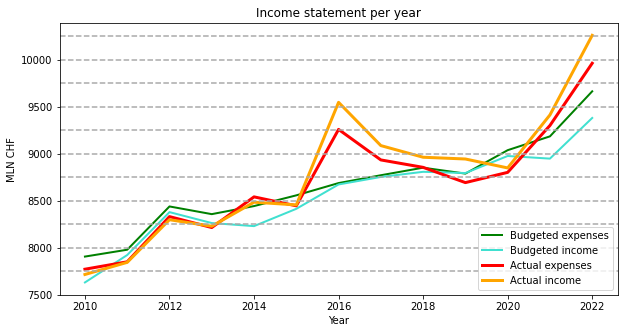

In [9]:
fig, ax = plt.subplots(figsize=(10,5))                        
ax.plot(df[df["Konto"] == "Aufwand"]["Jahr"], df[df["Konto"] == "Aufwand"]["B J"], color="green", linewidth=2, label="Budgeted expenses")
ax.plot(df[df["Konto"] == "Ertrag"]["Jahr"], df[df["Konto"] == "Ertrag"]["B J"], color="turquoise", linewidth=2, label="Budgeted income")
ax.plot(df[df["Konto"] == "Aufwand"]["Jahr"], df[df["Konto"] == "Aufwand"]["R J"], color="red", linewidth=3, label="Actual expenses")
ax.plot(df[df["Konto"] == "Ertrag"]["Jahr"], df[df["Konto"] == "Ertrag"]["R J"], color="orange", linewidth=3, label="Actual income")

[ax.axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(7750, 10500, 250)]

ax.set_title("Income statement per year")
ax.set_xlabel("Year")
ax.set_ylabel("MLN CHF")
ax.legend()
plt.show()

#### Discrepancies

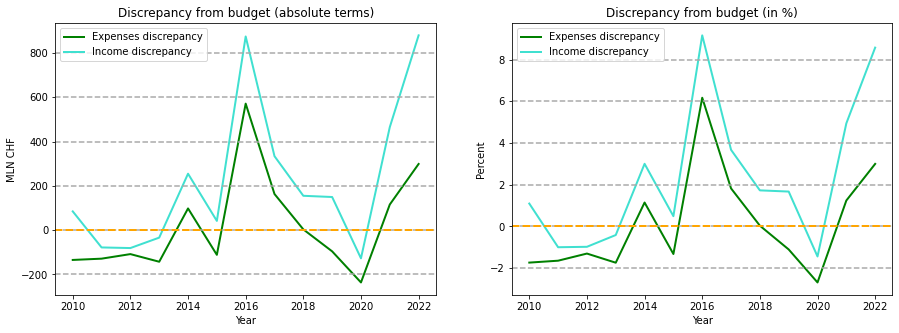

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))     

# left plot -> discrepancy in absolute terms
ax[0].plot(df[df["Konto"] == "Aufwand"]["Jahr"], df[df["Konto"] == "Aufwand"]["R J"] - df[df["Konto"] == "Aufwand"]["B J"], color="green", linewidth=2, label="Expenses discrepancy")
ax[0].plot(df[df["Konto"] == "Aufwand"]["Jahr"], df[df["Konto"] == "Ertrag"]["R J"] - df[df["Konto"] == "Ertrag"]["B J"], color="turquoise", linewidth=2, label="Income discrepancy")

[ax[0].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(-200, 1000, 200)]
ax[0].axhline(y = 0, color = 'orange', linestyle = '--', linewidth=2)

ax[0].set_title("Discrepancy from budget (absolute terms)")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("MLN CHF")
ax[0].legend()

# right plot -> discrepancy in %
ax[1].plot(df[df["Konto"] == "Aufwand"]["Jahr"], (df[df["Konto"] == "Aufwand"]["R J"] - df[df["Konto"] == "Aufwand"]["B J"]) / df[df["Konto"] == "Aufwand"]["R J"] * 100, color="green", linewidth=2, label="Expenses discrepancy")
ax[1].plot(df[df["Konto"] == "Aufwand"]["Jahr"], (df[df["Konto"] == "Ertrag"]["R J"] - df[df["Konto"] == "Ertrag"]["B J"]) / df[df["Konto"] == "Ertrag"]["R J"] * 100, color="turquoise", linewidth=2, label="Income discrepancy")

[ax[1].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(-2, 10, 2)]
ax[1].axhline(y = 0, color = 'orange', linestyle = '--', linewidth=2)

ax[1].set_title("Discrepancy from budget (in %)")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Percent")
ax[1].legend()


plt.show()

#### Values and discrepancies in %

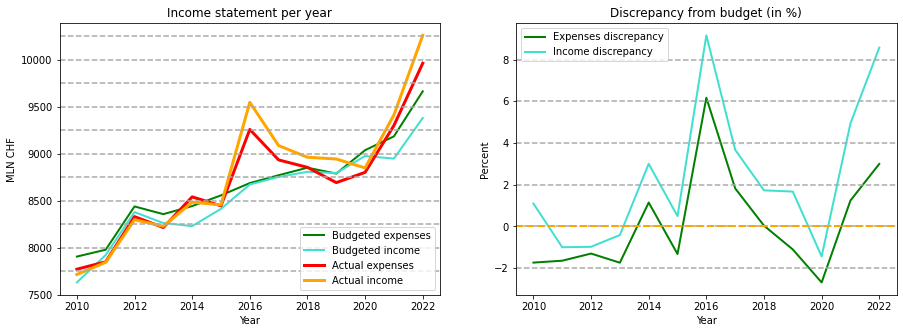

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))     

# left plot -> values
ax[0].plot(df[df["Konto"] == "Aufwand"]["Jahr"], df[df["Konto"] == "Aufwand"]["B J"], color="green", linewidth=2, label="Budgeted expenses")
ax[0].plot(df[df["Konto"] == "Ertrag"]["Jahr"], df[df["Konto"] == "Ertrag"]["B J"], color="turquoise", linewidth=2, label="Budgeted income")
ax[0].plot(df[df["Konto"] == "Aufwand"]["Jahr"], df[df["Konto"] == "Aufwand"]["R J"], color="red", linewidth=3, label="Actual expenses")
ax[0].plot(df[df["Konto"] == "Ertrag"]["Jahr"], df[df["Konto"] == "Ertrag"]["R J"], color="orange", linewidth=3, label="Actual income")

[ax[0].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(7750, 10500, 250)]

ax[0].set_title("Income statement per year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("MLN CHF")
ax[0].legend()

# right plot -> discrepancy in %
ax[1].plot(df[df["Konto"] == "Aufwand"]["Jahr"], (df[df["Konto"] == "Aufwand"]["R J"] - df[df["Konto"] == "Aufwand"]["B J"]) / df[df["Konto"] == "Aufwand"]["R J"] * 100, color="green", linewidth=2, label="Expenses discrepancy")
ax[1].plot(df[df["Konto"] == "Aufwand"]["Jahr"], (df[df["Konto"] == "Ertrag"]["R J"] - df[df["Konto"] == "Ertrag"]["B J"]) / df[df["Konto"] == "Ertrag"]["R J"] * 100, color="turquoise", linewidth=2, label="Income discrepancy")

[ax[1].axhline(y=i, color='darkgrey', linestyle='--') for i in np.arange(-2, 10, 2)]
ax[1].axhline(y = 0, color = 'orange', linestyle = '--', linewidth=2)

ax[1].set_title("Discrepancy from budget (in %)")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Percent")
ax[1].legend()


plt.show()

## 4. Exporting the DF as XLSX. For later comparison between cities

In [12]:
df.to_excel("2. zurich.xlsx")